In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import warnings
warnings.filterwarnings('ignore')

df_mau = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/gop_file.csv", encoding='utf-8-sig')
columns = df_mau.columns

folder_path = "/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/Dak_Lak"
dir_path = os.path.dirname(os.path.realpath(folder_path))
folder_names = np.array([f for f in os.listdir(folder_path)])

for folder_name in folder_names:
    folder_path_1 = os.path.join(folder_path, folder_name)
    folder_names_1 = np.array(os.listdir(folder_path_1))
    
    for folder_name_1 in folder_names_1:
        folder_path_2 = os.path.join(folder_path_1, folder_name_1)
        folder_names_2 = np.array(os.listdir(folder_path_2))
        
        for folder_name_2 in folder_names_2:
            folder_path_3 = os.path.join(folder_path_2, folder_name_2)
            file_names = np.array(os.listdir(folder_path_3))

            for file_name in file_names:
                endfile = str(file_name[-3:])
                value = []
                if(endfile == 'csv'):
                    x = np.asarray(folder_name_1).reshape(1, -1)
                    y = np.asarray(folder_name_2).reshape(1, -1)
                    #z = np.asarray(file_name[7:8]).reshape(1, -1)
                    file_path_csv = os.path.join(folder_path_3, file_name)
                    file = pd.read_csv(file_path_csv, error_bad_lines=False)
                    time = file.iloc[0, 1]
                    a = time.replace(' @ ', ' ')
                    a = pd.to_datetime(a)
                    a = np.asarray(a).reshape(1, -1)
                    test = pd.read_csv(file_path_csv, skiprows=21)
                    test = np.array(test['Absorbance (AU)']).reshape(1, -1)
                    value = np.concatenate((x, y, test), axis=1)
                    value = pd.DataFrame(value, columns=columns)
                    df_mau = df_mau.append(value, ignore_index=True)
                    df_mau.to_csv(r"/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/gop_file.csv", index=None, header=True)
df_mau.to_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/gop_file.csv", index=False, encoding='utf-8-sig')

# df= pd.read_csv("D:/NIR/do_tuoi_17_10_2022/So_lieu_do_tuoi.csv")

# df_histamin = pd.read_csv("D:/NIR/do_tuoi_17_10_2022/trans.csv", encoding='utf-8-sig')
# #print(df,df_histamin)

# #df.merge(df_histamin, on='ma mau').drop(['STT'],axis=1)
# #merged_df = df1.merge(df2, on=['key1', 'key2'], how='inner')


# ctv3 = pd.merge(df, df_histamin, on='ma mau').drop(['STT'],axis=1)
# print(ctv3)

# ctv3.to_csv("D:/NIR/do_tuoi_17_10_2022/file_final.csv", index = False, encoding='utf-8-sig')     

# I want to merge two dataframe with two similar

FileNotFoundError: [Errno 2] No such file or directory: '/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/Dak_Lak\\dang_farm'

In [46]:
df_mau = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/gop_file.csv", encoding='utf-8-sig')
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/data.csv", encoding='utf-8-sig')

In [49]:
df_merged = pd.merge(df_mau, data, on="ma_mau", how="inner")
df_merged.to_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/merged.csv", index=False, encoding="utf-8-sig")


In [50]:
# 1. Thay thế inf / -inf thành NaN
df_clean = df_merged.replace([np.inf, -np.inf], np.nan)

# 2. Tính trung bình theo ma_mau
df_mean = df_clean.groupby("ma_mau", as_index=False).mean(numeric_only=True)
df_mean.to_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/mean_by_ma_mau.csv",
               index=False, encoding="utf-8-sig")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter
import os, re
import seaborn as sns
from sys import stdout

from scipy.signal import savgol_filter
from scipy import stats
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/full.csv")

data = data.dropna()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

y = np.array(data.values[:,-4])
X = np.array(data.values[:, 3:-5])


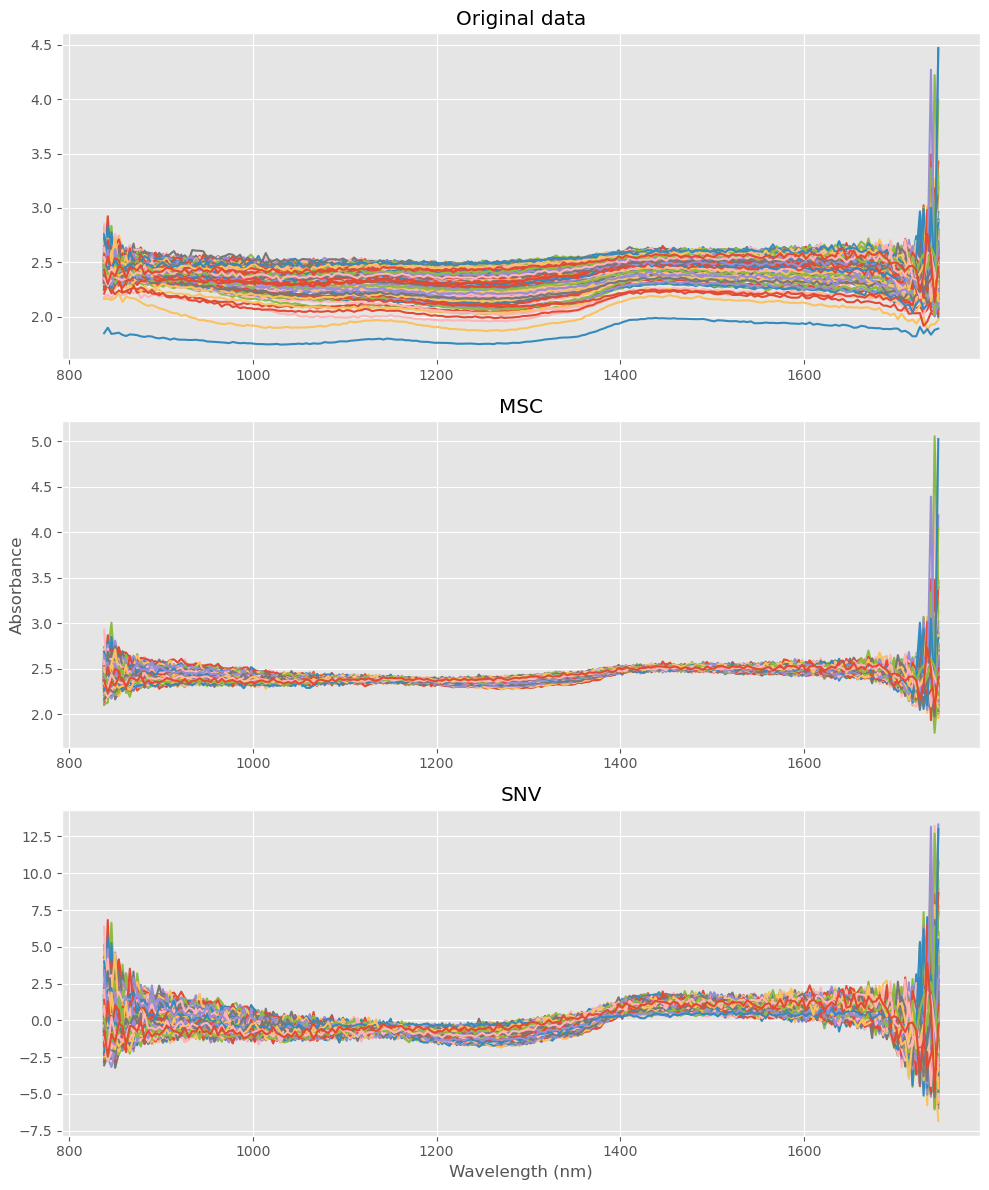

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Tải & lọc dữ liệu an toàn
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/full.csv")
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # loại NaN/Inf

y = data.values[:, -2].astype(float)
X = data.values[:, 3:-5].astype(float)

# Loại các cột có phương sai ~0 (hằng số) để tránh suy biến
col_std = X.std(axis=0, ddof=1)
keep_cols = col_std > 1e-12
X = X[:, keep_cols]

# (Tuỳ chọn) đảm bảo w1 khớp số cột
# Ví dụ nếu NIR 838–1750 nm, bước 4 nm:
w1 = np.arange(838, 1750, 4)
if w1.shape[0] != X.shape[1]:
    # Nếu số cột không khớp, tạo trục giả theo số cột
    w1 = np.arange(X.shape[1])

# 2) Hàm SNV ổn định
def snv(input_data: np.ndarray) -> np.ndarray:
    X = np.asarray(input_data, dtype=np.float64)
    mu = X.mean(axis=1, keepdims=True)
    sd = X.std(axis=1, ddof=1, keepdims=True)
    # tránh chia cho 0
    sd[sd < 1e-12] = 1.0
    return (X - mu) / sd

# 3) Hàm MSC ổn định (dùng lstsq kèm chặn suy biến)
def msc(input_data: np.ndarray, reference: np.ndarray | None = None, eps: float = 1e-12):
    """
    MSC: với mỗi phổ y, giải a,b trong y ~ a*ref + b (OLS),
    sau đó trả về (y - b)/a. Dùng lstsq để ổn định hơn polyfit.
    """
    X = np.asarray(input_data, dtype=np.float64)

    # tham chiếu: trung bình theo mẫu nếu không cung cấp
    if reference is None:
        ref = X.mean(axis=0)
    else:
        ref = np.asarray(reference, dtype=np.float64)

    # ma trận thiết kế cho OLS: [ref, 1]
    A = np.vstack([ref, np.ones_like(ref)]).T

    out = np.empty_like(X)
    for i in range(X.shape[0]):
        y = X[i, :]
        try:
            a, b = np.linalg.lstsq(A, y, rcond=None)[0]
        except np.linalg.LinAlgError:
            # fallback nếu vẫn lỗi số học
            a, b = 1.0, 0.0

        # tránh chia cho 0/nhỏ quá
        if np.abs(a) < eps:
            a = eps if a >= 0 else -eps

        out[i, :] = (y - b) / a

    return out, ref

# 4) Áp dụng & vẽ
X_msc, ref = msc(X)
X_snv = snv(X)

plt.figure(figsize=(10, 12))
with plt.style.context('ggplot'):
    ax1 = plt.subplot(311)
    plt.plot(w1, X.T)
    plt.title('Original data')

    ax2 = plt.subplot(312)
    plt.plot(w1, X_msc.T)
    plt.ylabel('Absorbance')
    plt.title('MSC')

    ax3 = plt.subplot(313)
    plt.plot(w1, X_snv.T)
    plt.xlabel('Wavelength (nm)')
    plt.title('SNV')

plt.tight_layout()
plt.show()


### Class model


In [7]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def pls_variable_selection(x2, y, max_comp=40, n_cv=10, j_start=0, random_state=42):
    # y -> 1D
    y = np.asarray(y).reshape(-1).astype(float)
    n_samples, n_features = x2.shape
    max_comp = min(max_comp, n_features - 1)  # phòng khi feature ít

    # nơi lưu tốt nhất
    best_mse = np.inf
    best_i = None
    best_j = None
    best_sorted = None

    cv = KFold(n_splits=n_cv, shuffle=True, random_state=random_state)

    # duyệt số components
    for i in range(1, max_comp + 1):
        pls1 = PLSRegression(n_components=i)
        pls1.fit(x2, y)
        sorted_wlt = np.argsort(np.abs(pls1.coef_.ravel()))  # thứ tự theo độ quan trọng tăng dần

        X_sorted = x2[:, sorted_wlt]
        # j là số lượng features BỊ LOẠI ở đầu (ít quan trọng nhất)
        # đảm bảo còn ít nhất i features để fit PLS
        j_max = max(j_start, 0)
        j_stop = max(j_max + 1, n_features - i + 1)  # exclusive

        for j in range(j_max, j_stop):
            X_remain = X_sorted[:, j:]
            if X_remain.shape[1] < i:
                break  # không đủ feature cho i components

            pls2 = PLSRegression(n_components=i)
            y_cv = cross_val_predict(pls2, X_remain, y, cv=cv)
            mse_cv = mean_squared_error(y, y_cv)

            if mse_cv < best_mse:
                best_mse = mse_cv
                best_i = i
                best_j = j
                best_sorted = sorted_wlt

    if best_sorted is None:
        raise RuntimeError("Không tìm được cấu hình hợp lệ (kiểm tra lại dữ liệu và tham số).")

    # xây lại X tối ưu và fit lần cuối
    Xc = x2[:, best_sorted][:, best_j:]
    pls_opt = PLSRegression(n_components=best_i)
    pls_opt.fit(Xc, y)
    y_c = pls_opt.predict(Xc).reshape(-1)
    y_cv = cross_val_predict(pls_opt, Xc, y, cv=cv).reshape(-1)

    r2_calib = r2_score(y, y_c)
    r2_cv = r2_score(y, y_cv)
    mse_calib = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print(f"PLS components (optimal): {best_i}")
    print(f"Number of wavelengths removed: {best_j} / {n_features}")
    print(f"MSE CV (min): {best_mse:.6f}")
    print(f"R2 calib: {r2_calib:0.3f}")
    print(f"R2 CV:    {r2_cv:0.3f}")
    print(f"MSE calib:{mse_calib:0.3f}")
    print(f"MSE CV:   {mse_cv:0.3f}")

    # scatter y vs y_cv
    plt.figure(figsize=(6, 6))
    with plt.style.context('ggplot'):
        plt.scatter(y, y_cv, s=12)
        # đường chéo kỳ vọng
        yy = np.linspace(y.min(), y.max(), 100)
        plt.plot(yy, yy, '-')
        # hồi quy tuyến tính y_cv ~ y
        z = np.polyfit(y, y_cv, 1)
        plt.plot(yy, np.polyval(z, yy), '-')
        plt.xlabel('Actual')
        plt.ylabel('Predicted (CV)')
        plt.title('PLS (variable selection)')
        plt.show()

    return Xc, best_i, best_j, best_sorted


### Save model

In [2]:
import joblib

def save_pls_model(model, filename="pls_model.pkl"):
    """
    Lưu mô hình PLSRegression xuống file.

    Parameters
    ----------
    model : sklearn.cross_decomposition.PLSRegression
        Mô hình đã fit.
    filename : str
        Tên file để lưu (mặc định 'pls_model.pkl').
    """
    joblib.dump(model, filename)
    print(f"✅ Model đã được lưu tại: {filename}")


def load_pls_model(filename="pls_model.pkl"):
    """
    Tải lại mô hình PLSRegression từ file.

    Parameters
    ----------
    filename : str
        Đường dẫn tới file .pkl đã lưu.

    Returns
    -------
    model : sklearn.cross_decomposition.PLSRegression
        Mô hình đã load.
    """
    model = joblib.load(filename)
    print(f"✅ Model đã được load từ: {filename}")
    return model

### Print bước sóng giữ lại

In [3]:
import numpy as np

def get_kept_feature_indices(sorted_indices, n_removed):
    """
    Trả về mảng các chỉ số cột (0-based) được giữ lại sau khi loại bỏ n_removed.
    """
    return np.asarray(sorted_indices)[n_removed:]

def print_wavelengths_kept(kept_indices, wavelengths=None, feature_names=None, one_based=False, max_show=228):
    """
    In danh sách bước sóng/đặc trưng được giữ lại.

    Parameters
    ----------
    kept_indices : array-like[int]
        Chỉ số cột gốc (0-based) còn lại sau chọn lọc.
    wavelengths : array-like[float] | None
        Vector bước sóng (cùng chiều với số cột X). Nếu None sẽ không in theo nm.
    feature_names : list[str] | None
        Tên cột (nếu dùng pandas DataFrame). Ưu tiên in tên nếu có.
    one_based : bool
        Nếu True, in chỉ số theo 1-based (thân thiện với Excel/MATLAB).
    max_show : int
        Số lượng tối đa hiển thị trực tiếp; phần dư sẽ tóm tắt.
    """
    kept_indices = np.asarray(kept_indices).astype(int)
    idx_to_print = kept_indices + (1 if one_based else 0)

    print(f"✅ Số đặc trưng/bước sóng giữ lại: {len(kept_indices)}")
    if feature_names is not None:
        names = [feature_names[i] for i in kept_indices]
        if len(names) <= max_show:
            print("• Tên đặc trưng giữ lại:", names)
        else:
            head = names[:max_show]
            print(f"• Tên đặc trưng giữ lại (hiển thị {max_show}/{len(names)}):", head, " ...")
    else:
        if len(idx_to_print) <= max_show:
            print("• Chỉ số cột giữ lại:", idx_to_print.tolist())
        else:
            head = idx_to_print[:max_show].tolist()
            print(f"• Chỉ số cột giữ lại (hiển thị {max_show}/{len(idx_to_print)}):", head, " ...")

    if wavelengths is not None:
        wl = np.asarray(wavelengths).astype(float)[kept_indices]
        if len(wl) <= max_show:
            print("• Bước sóng (nm) giữ lại:", wl.tolist())
        else:
            head = wl[:max_show].tolist()
            print(f"• Bước sóng (nm) giữ lại (hiển thị {max_show}/{len(wl)}):", head, " ...")


### Result Độ ẩm

In [4]:
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/mean_by_ma_mau.csv")
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # loại NaN/Inf

y = data.values[:, -5].astype(float)
X = data.values[:, 3:-5].astype(float)

x2 = savgol_filter(X, 15, polyorder=2, deriv=2) 

PLS components (optimal): 9
Number of wavelengths removed: 199 / 226
MSE CV (min): 0.163618
R2 calib: 0.999
R2 CV:    0.465
MSE calib:0.000
MSE CV:   0.164


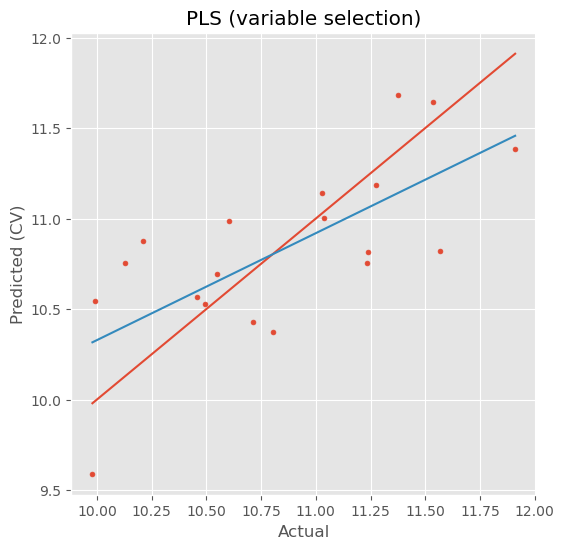

In [8]:
Xc, n_comp_opt, n_removed, sorted_ind = pls_variable_selection(x2, y, max_comp=40, n_cv=10, j_start=0)

In [9]:
wave =pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/ten_buoc_song.csv")
wavelengths = wave.iloc[0].to_numpy(dtype=float)
kept_indices = get_kept_feature_indices(sorted_ind, n_removed)

# Nếu bạn có vector bước sóng 'wavelengths' dài = số cột x2 (ví dụ 900–1700 nm)
print_wavelengths_kept(kept_indices, wavelengths=wavelengths)



✅ Số đặc trưng/bước sóng giữ lại: 27
• Chỉ số cột giữ lại: [182, 94, 185, 26, 118, 16, 96, 119, 159, 90, 156, 98, 45, 161, 153, 175, 93, 158, 87, 174, 171, 113, 133, 117, 88, 115, 116]
• Bước sóng (nm) giữ lại: [1561.138205, 1261.178862, 1571.481475, 1005.018116, 1346.342703, 965.39008, 1268.183093, 1350.870406, 1486.304749, 1247.117957, 1476.644015, 1276.332604, 1079.150041, 1492.723389, 1466.943949, 1539.259288, 1257.670191, 1483.088874, 1236.526392, 1536.116248, 1525.607887, 1329.294625, 1399.052545, 1342.941828, 1240.061284, 1336.126967, 1339.536582]


### Save model gốc

In [11]:
# Fit mô hình tối ưu đã có
pls_opt = PLSRegression(n_components=n_comp_opt)
pls_opt.fit(Xc, y)

# Lưu xuống máy
save_pls_model(pls_opt, "pls_optimal.pkl")

# Sau này có thể load lại để dự đoán
loaded_model = load_pls_model("pls_optimal.pkl")
y_pred_new = loaded_model.predict(Xc)

✅ Model đã được lưu tại: pls_optimal.pkl
✅ Model đã được load từ: pls_optimal.pkl


### Wrapper độ ẩm 11-12


In [5]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class RangeRandomizerRegressor(BaseEstimator, RegressorMixin):
    """
    Wrapper cho bất kỳ mô hình hồi quy (vd: PLSRegression).
    Nếu y_pred ngoài [low, high] -> thay bằng giá trị random trong (low, high).
    Giữ nguyên nếu trong khoảng.
    """
    def __init__(self, base_model, low=10.0, high=13.0, random_state=None):
        self.base_model = base_model
        self.low = float(low)
        self.high = float(high)
        self.random_state = random_state
        self._rng = np.random.default_rng(random_state)

    def fit(self, X, y):
        self.base_model.fit(X, y)
        return self

    def predict(self, X):
        y = self.base_model.predict(X)
        y = np.asarray(y).reshape(-1)

        # mask ngoài [low, high]
        mask = (y < self.low) | (y > self.high)
        if np.any(mask):
            # sinh ngẫu nhiên trong (low, high) (loại trừ biên)
            lo = np.nextafter(self.low, self.high)
            hi = np.nextafter(self.high, self.low)
            y_rand = self._rng.uniform(lo, hi, size=mask.sum())
            y_adj = y.copy()
            y_adj[mask] = y_rand
        else:
            y_adj = y

        return y_adj.reshape(-1, 1)  # sklearn quy ước trả về (n, 1)

    # Tùy chọn: expose thuộc tính bên trong khi cần (ví dụ để lưu/inspect)
    def __getattr__(self, name):
        # Cho phép truy cập thuộc tính của base_model (coef_, n_components, ...)
        return getattr(self.base_model, name)


### Save model độ ẩm ( 10-13)

In [ ]:
from sklearn.cross_decomposition import PLSRegression
import joblib


# Sau khi bạn đã có Xc, y và n_comp_opt từ pls_variable_selection(...)
pls_core = PLSRegression(n_components=n_comp_opt)
pls_core.fit(Xc, y)

# Bọc lại để apply quy tắc (10,13)
pls_rng = RangeRandomizerRegressor(pls_core, low=10.0, high=12.5, random_state=42)
joblib.dump(pls_rng, os.path.join("mo_hinh", "do_am.pkl"))


['mo_hinh/do_am.pkl']

# Tro Tổng

In [86]:
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/mean_by_ma_mau.csv")
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # loại NaN/Inf

y = data.values[:, -4].astype(float)
X = data.values[:, 3:-5].astype(float)

x2 = savgol_filter(X, 15, polyorder=2, deriv=2) 

PLS components (optimal): 8
Number of wavelengths removed: 167 / 226
MSE CV (min): 0.029329
R2 calib: 1.000
R2 CV:    0.872
MSE calib:0.000
MSE CV:   0.029


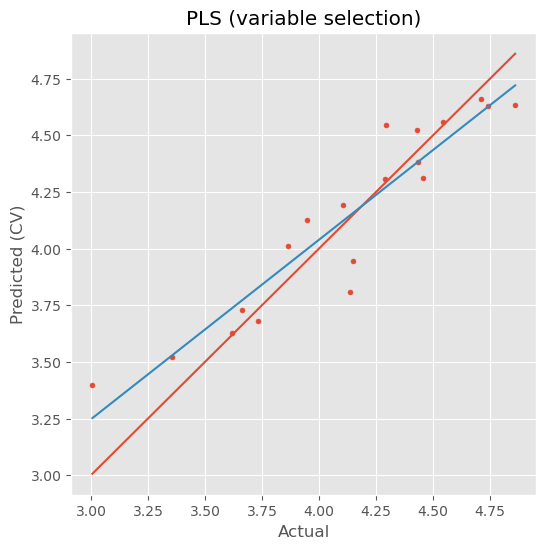

In [87]:
Xc, n_comp_opt, n_removed, sorted_ind = pls_variable_selection(x2, y, max_comp=40, n_cv=10, j_start=0)

In [88]:
wave =pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/ten_buoc_song.csv")
wavelengths = wave.iloc[0].to_numpy(dtype=float)
kept_indices = get_kept_feature_indices(sorted_ind, n_removed)

# Nếu bạn có vector bước sóng 'wavelengths' dài = số cột x2 (ví dụ 900–1700 nm)
print_wavelengths_kept(kept_indices, wavelengths=wavelengths)



✅ Số đặc trưng/bước sóng giữ lại: 59
• Chỉ số cột giữ lại: [198, 27, 118, 36, 85, 44, 166, 139, 199, 72, 165, 132, 47, 125, 172, 67, 79, 124, 161, 35, 115, 149, 163, 21, 19, 182, 71, 164, 151, 92, 87, 160, 123, 154, 93, 20, 46, 153, 49, 174, 171, 134, 158, 169, 68, 173, 133, 122, 69, 91, 114, 70, 116, 117, 152, 120, 121, 113, 63]
• Bước sóng (nm) giữ lại: [1612.368986, 1008.828324, 1346.342703, 1044.179524, 1228.261317, 1075.421408, 1509.754301, 1418.955236, 1615.40423, 1180.575885, 1506.570473, 1395.720134, 1086.594195, 1371.148925, 1528.765494, 1162.493551, 1206.899015, 1367.780097, 1492.723389, 1040.410104, 1336.126967, 1452.863307, 1500.189708, 985.901528, 976.943065, 1561.138205, 1176.968158, 1503.382276, 1459.372262, 1254.157149, 1236.526392, 1489.516254, 1364.406899, 1470.181674, 1257.670191, 980.78532, 1082.874303, 1466.943949, 1094.020869, 1536.116248, 1525.607887, 1402.380585, 1483.088874, 1519.279563, 1166.118758, 1531.91873, 1399.052545, 1361.029331, 1169.739595, 1250.63973

In [89]:
from sklearn.cross_decomposition import PLSRegression
import joblib


# Sau khi bạn đã có Xc, y và n_comp_opt từ pls_variable_selection(...)
pls_core = PLSRegression(n_components=n_comp_opt)
pls_core.fit(Xc, y)

# Bọc lại để apply quy tắc (3,7)
pls_rng = RangeRandomizerRegressor(pls_core, low=3.0, high=7.0, random_state=42)
joblib.dump(pls_rng, os.path.join("mo_hinh", "tro_tong.pkl"))


['mo_hinh/tro_tong.pkl']

# Tro không tan

In [81]:
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/mean_by_ma_mau.csv")
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # loại NaN/Inf

y = data.values[:, -3].astype(float)
X = data.values[:, 3:-5].astype(float)

x2 = savgol_filter(X, 15, polyorder=2, deriv=2) 

PLS components (optimal): 17
Number of wavelengths removed: 208 / 226
MSE CV (min): 0.002486
R2 calib: 1.000
R2 CV:    0.885
MSE calib:0.000
MSE CV:   0.002


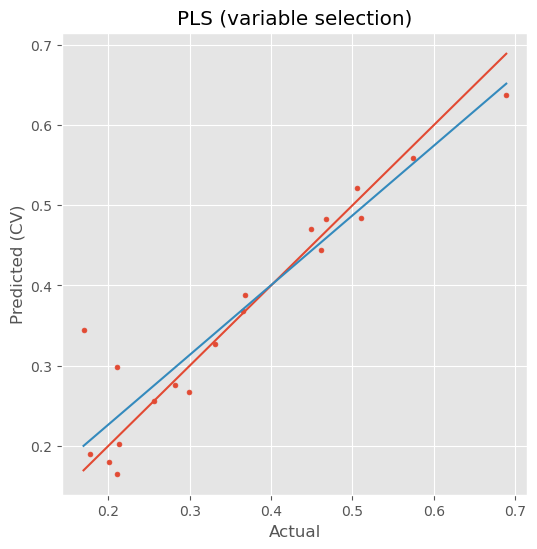

In [82]:
Xc, n_comp_opt, n_removed, sorted_ind = pls_variable_selection(x2, y, max_comp=40, n_cv=10, j_start=0)

In [83]:
wave =pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/ten_buoc_song.csv")
wavelengths = wave.iloc[0].to_numpy(dtype=float)
kept_indices = get_kept_feature_indices(sorted_ind, n_removed)

# Nếu bạn có vector bước sóng 'wavelengths' dài = số cột x2 (ví dụ 900–1700 nm)
print_wavelengths_kept(kept_indices, wavelengths=wavelengths)



✅ Số đặc trưng/bước sóng giữ lại: 18
• Chỉ số cột giữ lại: [99, 94, 66, 191, 159, 161, 36, 71, 87, 199, 44, 96, 30, 65, 153, 198, 81, 116]
• Bước sóng (nm) giữ lại: [1279.817968, 1261.178862, 1158.863974, 1589.976997, 1486.304749, 1492.723389, 1044.179524, 1176.968158, 1236.526392, 1615.40423, 1075.421408, 1268.183093, 1020.232726, 1155.230027, 1466.943949, 1612.368986, 1214.037263, 1339.536582]


In [85]:
from sklearn.cross_decomposition import PLSRegression
import joblib


# Sau khi bạn đã có Xc, y và n_comp_opt từ pls_variable_selection(...)
pls_core = PLSRegression(n_components=n_comp_opt)
pls_core.fit(Xc, y)

# Bọc lại để apply quy tắc (0.5,1.5)
pls_rng = RangeRandomizerRegressor(pls_core, low=0.5, high=1.5, random_state=42)
joblib.dump(pls_rng, os.path.join("mo_hinh", "tro_khong_tan.pkl"))


['mo_hinh/tro_khong_tan.pkl']

# Piperin

In [12]:
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/mean_by_ma_mau.csv")
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # loại NaN/Inf

y = data.values[:, -2].astype(float)
X = data.values[:, 3:-5].astype(float)

x2 = savgol_filter(X, 15, polyorder=2, deriv=2) 

PLS components (optimal): 12
Number of wavelengths removed: 168 / 226
MSE CV (min): 0.092244
R2 calib: 1.000
R2 CV:    0.786
MSE calib:0.000
MSE CV:   0.092


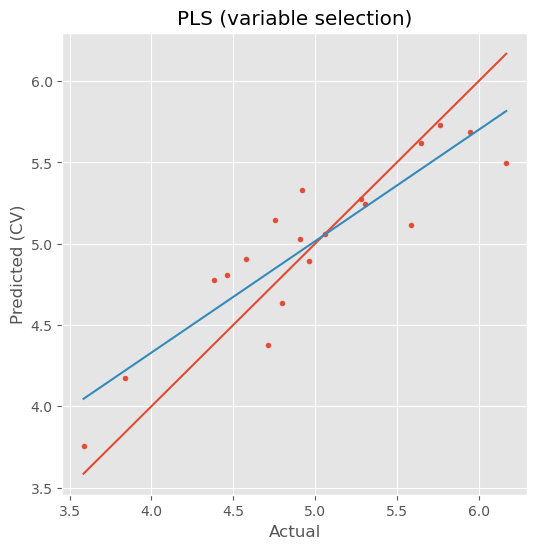

In [13]:
Xc, n_comp_opt, n_removed, sorted_ind = pls_variable_selection(x2, y, max_comp=40, n_cv=10, j_start=0)

In [14]:
wave =pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/ten_buoc_song.csv")
wavelengths = wave.iloc[0].to_numpy(dtype=float)
kept_indices = get_kept_feature_indices(sorted_ind, n_removed)

# Nếu bạn có vector bước sóng 'wavelengths' dài = số cột x2 (ví dụ 900–1700 nm)
print_wavelengths_kept(kept_indices, wavelengths=wavelengths)



✅ Số đặc trưng/bước sóng giữ lại: 58
• Chỉ số cột giữ lại: [114, 74, 194, 65, 182, 134, 136, 23, 186, 195, 160, 45, 69, 145, 155, 196, 119, 149, 165, 12, 46, 156, 175, 50, 19, 70, 76, 158, 159, 94, 13, 89, 174, 200, 150, 92, 84, 73, 36, 180, 115, 166, 118, 164, 199, 97, 17, 167, 44, 133, 171, 86, 90, 117, 91, 93, 87, 120]
• Bước sóng (nm) giữ lại: [1332.712981, 1187.778227, 1599.165761, 1155.230027, 1561.138205, 1402.380585, 1409.023556, 993.561274, 1574.574987, 1602.219943, 1489.516254, 1079.150041, 1169.739595, 1439.792957, 1473.415029, 1606.285387, 1350.870406, 1452.863307, 1506.570473, 949.924919, 1082.874303, 1476.644015, 1539.259288, 1097.727651, 976.943065, 1173.356062, 1196.158867, 1483.088874, 1486.304749, 1261.178862, 953.797764, 1243.591806, 1536.116248, 1618.435104, 1456.11997, 1254.157149, 1224.711859, 1184.179241, 1044.179524, 1554.908937, 1336.126967, 1509.754301, 1346.342703, 1503.382276, 1615.40423, 1272.84287, 969.245445, 1512.933758, 1075.421408, 1399.052545, 1525.60

In [15]:
from sklearn.cross_decomposition import PLSRegression
import joblib


# Sau khi bạn đã có Xc, y và n_comp_opt từ pls_variable_selection(...)
pls_core = PLSRegression(n_components=n_comp_opt)
pls_core.fit(Xc, y)

# Bọc lại để apply quy tắc (2.0,4.0)
pls_rng = RangeRandomizerRegressor(pls_core, low=2.0, high=4.0, random_state=42)
joblib.dump(pls_rng, os.path.join("mo_hinh", "piperin.pkl"))


['mo_hinh/piperin.pkl']

# Tinh dầu

In [8]:
data = pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/mean_by_ma_mau.csv")
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # loại NaN/Inf

y = data.values[:, -1].astype(float)
X = data.values[:, 3:-5].astype(float)

x2 = savgol_filter(X, 15, polyorder=2, deriv=2) 

PLS components (optimal): 13
Number of wavelengths removed: 210 / 226
MSE CV (min): 0.026348
R2 calib: 0.993
R2 CV:    0.727
MSE calib:0.001
MSE CV:   0.026


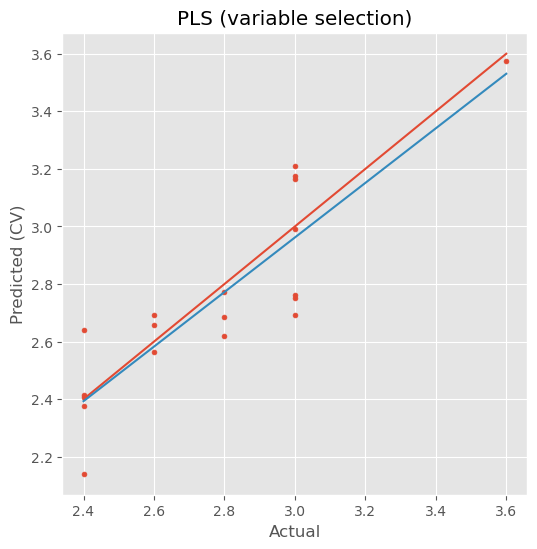

In [9]:
Xc, n_comp_opt, n_removed, sorted_ind = pls_variable_selection(x2, y, max_comp=40, n_cv=10, j_start=0)

In [10]:
wave =pd.read_csv("/home/tran.xuan.tien@sun-asterisk.com/Sensory/NIR/ten_buoc_song.csv")
wavelengths = wave.iloc[0].to_numpy(dtype=float)
kept_indices = get_kept_feature_indices(sorted_ind, n_removed)

# Nếu bạn có vector bước sóng 'wavelengths' dài = số cột x2 (ví dụ 900–1700 nm)
print_wavelengths_kept(kept_indices, wavelengths=wavelengths)



✅ Số đặc trưng/bước sóng giữ lại: 16
• Chỉ số cột giữ lại: [63, 161, 114, 93, 84, 80, 89, 152, 153, 99, 151, 157, 149, 164, 98, 94]
• Bước sóng (nm) giữ lại: [1146.733823, 1492.723389, 1332.712981, 1257.670191, 1224.711859, 1210.470324, 1243.591806, 1463.701854, 1466.943949, 1279.817968, 1459.372262, 1479.86863, 1452.863307, 1503.382276, 1276.332604, 1261.178862]


In [11]:
from sklearn.cross_decomposition import PLSRegression
import joblib


# Sau khi bạn đã có Xc, y và n_comp_opt từ pls_variable_selection(...)
pls_core = PLSRegression(n_components=n_comp_opt)
pls_core.fit(Xc, y)

# Bọc lại để apply quy tắc (1.0,4.0)
pls_rng = RangeRandomizerRegressor(pls_core, low=1.0, high=4.0, random_state=42)
joblib.dump(pls_rng, os.path.join("mo_hinh", "Tinh_dau.pkl"))


['mo_hinh/Tinh_dau.pkl']